In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [566]:
River_Arno = pd.read_csv('./datasets/River_Arno.csv')

In [567]:
River_Arno

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [568]:
River_Arno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [569]:
River_Arno.shape

(8217, 17)

### Filled Entries

<AxesSubplot:>

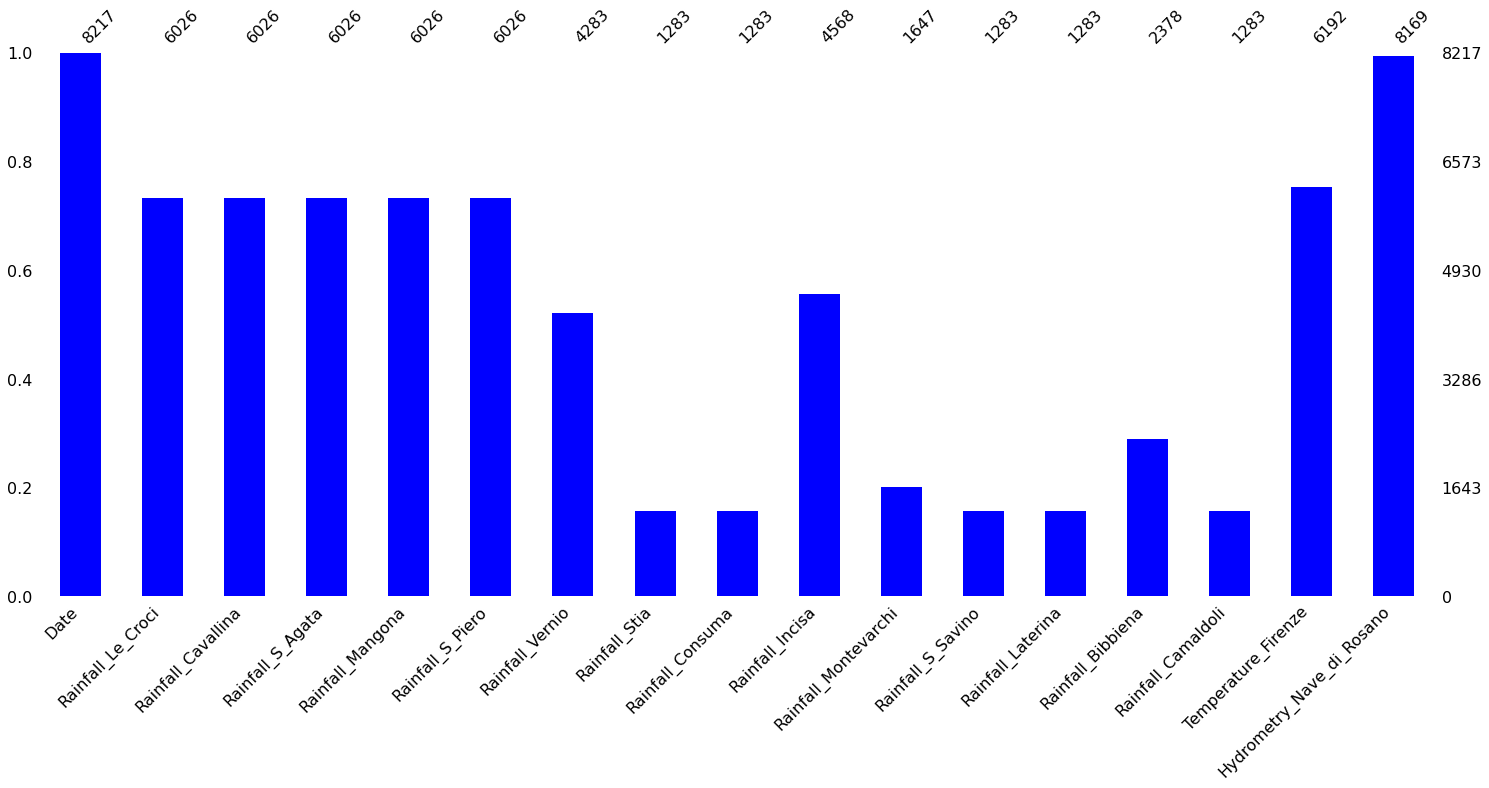

In [570]:
msno.bar(River_Arno,color='b')

In [571]:
# River_Arno = River_Arno.drop(River_Arno['Hydrometry_Nave_di_Rosano'].isnull().sum(),axis=0)


In [572]:
# River_Arno['Hydrometry_Nave_di_Rosano'].isnull().sum()

### Dates starting and ending values

In [573]:
print('starting date:', River_Arno.Date.values[[0,-1]][0])
print('ending date:', River_Arno.Date.values[[0,-1]][1])


starting date: 01/01/1998
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

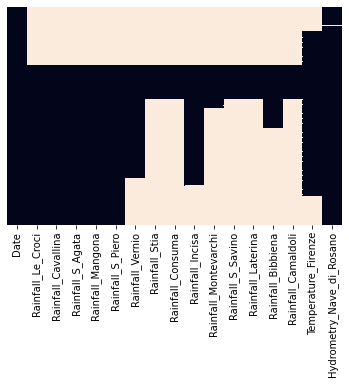

In [574]:
sns.heatmap(River_Arno.isnull(),yticklabels=False,cbar=False)

In [575]:
data=River_Arno.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

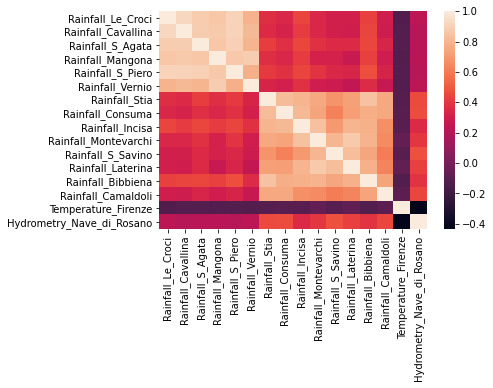

In [576]:
sns.heatmap(data.corr())

In [577]:
features_nan=[features for features in River_Arno.columns if River_Arno[features].isnull().sum()>1 and River_Arno[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(River_Arno[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Le_Croci 26.6642 % missing 
Rainfall_Cavallina 26.6642 % missing 
Rainfall_S_Agata 26.6642 % missing 
Rainfall_Mangona 26.6642 % missing 
Rainfall_S_Piero 26.6642 % missing 
Rainfall_Vernio 47.8764 % missing 
Rainfall_Stia 84.386 % missing 
Rainfall_Consuma 84.386 % missing 
Rainfall_Incisa 44.4079 % missing 
Rainfall_Montevarchi 79.9562 % missing 
Rainfall_S_Savino 84.386 % missing 
Rainfall_Laterina 84.386 % missing 
Rainfall_Bibbiena 71.06 % missing 
Rainfall_Camaldoli 84.386 % missing 
Temperature_Firenze 24.644 % missing 
Hydrometry_Nave_di_Rosano 0.5842 % missing 


In [578]:
'''
Columns that are going to be dropped

'Date',
'Hydrometry_Nave_di_Rosano', # Target Variable
'Rainfall_S_Savino',
'Rainfall_Consuma',
'Rainfall_Laterina',
'Rainfall_Camaldoli',
'Rainfall_Stia',
'Temperature_Firenze',
'Rainfall_Montevarchi',
'Rainfall_Bibbiena',
'Rainfall_Incisa'

'''

"\nColumns that are going to be dropped\n\n'Date',\n'Hydrometry_Nave_di_Rosano', # Target Variable\n'Rainfall_S_Savino',\n'Rainfall_Consuma',\n'Rainfall_Laterina',\n'Rainfall_Camaldoli',\n'Rainfall_Stia',\n'Temperature_Firenze',\n'Rainfall_Montevarchi',\n'Rainfall_Bibbiena',\n'Rainfall_Incisa'\n\n"

In [579]:
River_Arno_corr = River_Arno.drop(['Rainfall_S_Savino','Rainfall_Consuma','Rainfall_Laterina','Rainfall_Camaldoli','Rainfall_Stia','Temperature_Firenze','Date','Rainfall_Montevarchi','Rainfall_Bibbiena','Rainfall_Incisa'],axis=1)

<AxesSubplot:>

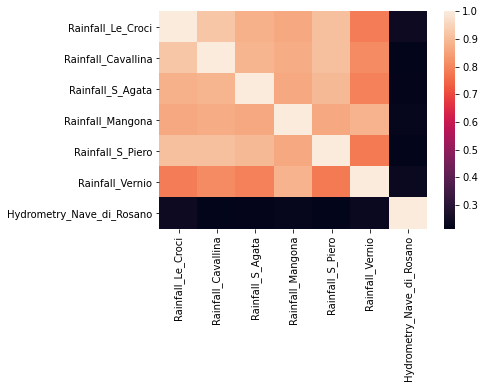

In [581]:
sns.heatmap(River_Arno_corr.corr())

In [582]:
a = River_Arno_corr

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Le_Croci 26.6642 % missing 
Rainfall_Cavallina 26.6642 % missing 
Rainfall_S_Agata 26.6642 % missing 
Rainfall_Mangona 26.6642 % missing 
Rainfall_S_Piero 26.6642 % missing 
Rainfall_Vernio 47.8764 % missing 
Hydrometry_Nave_di_Rosano 0.5842 % missing 


### Imputation